In [7]:
import os
import sys
sys.path.append("./../")
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd
import yaml
import h5py
import vicon_imu_data_process.process_landing_data as pro_rd

import seaborn as sns
import copy
import re
import json

from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS, DATA_PATH
from vicon_imu_data_process.const import DROPLANDING_PERIOD, RESULTS_PATH
from vicon_imu_data_process import const

#from models.rnn_models import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import time as localtimepkg

#from estimation_study import *
from assessments.visualization import *
#import pdb
import re

import logging
logging.basicConfig(level=logging.ERROR)

## Original dataset

In [3]:
result_folders = read_result_folder_file("original_layer_subject_num.txt")

#result_folders = read_result_folder_file("da_e_rotation.txt")
#result_folders = read_result_folder_file("da_e_scale.txt")

In [4]:
combination_investigation_results=[os.path.join(RESULTS_PATH, "training_testing", result_folder,"testing_result_folders.txt")
                                   for result_folder in result_folders]

# 2) get testing metrics
combination_investigation_results = [os.path.join(os.path.dirname(folder), "metrics.csv") if(os.path.exists(os.path.join(os.path.dirname(folder), "metrics.csv"))) else folder for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_results)


/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_11_30_a5/metrics.csv
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_1_30_a5/metrics.csv
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_13_30_a5/metrics.csv
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_15_30_a5/metrics.csv
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_3_30_a5/metrics.csv
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_5_30_a5/metrics.csv
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_7_30_a5/metrics.csv
/media/sun/TFcard/drop_landing_workspace/resu

In [5]:
filters={'drop_value':0.0}
metrics = parse_list_investigation_metrics(combination_investigation_results,**filters)

/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_11_30_a5/metrics.csv
DROP R2 cases below :0.0
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_1_30_a5/metrics.csv
DROP R2 cases below :0.0
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_13_30_a5/metrics.csv
DROP R2 cases below :0.0
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_15_30_a5/metrics.csv
DROP R2 cases below :0.0
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_3_30_a5/metrics.csv
DROP R2 cases below :0.0
/media/sun/TFcard/drop_landing_workspace/results/training_testing/rdouble_leg_baseline_1_original_R_KNEE_MOMENT_X_6_5_30_a5/metrics.csv
DROP R2 cases below :0.0
/media/sun/TFcard/drop_landing_

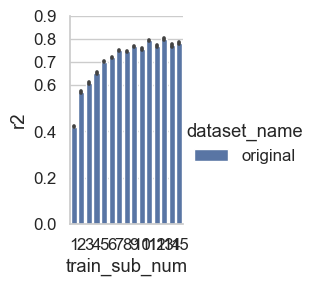

In [6]:
plt.clf
sns.set(font_scale=1.1,style='whitegrid')
states_palette = sns.color_palette()
colors = sns.color_palette("YlGnBu")


#metrics = metrics.rename(columns={'train_sub_num':'Subject number'})

config={
    'y': 'r2',
    'x':'train_sub_num',
    'kind': 'bar',
    'height': 3,
    'aspect': 0.8,
    'sharey': True,
    'hue': 'dataset_name',
    #'col': 'child_test_id',
    #'col_wrap': 4,
    'color':colors, # for bar
    "palette": states_palette # for hue
}


g = sns.catplot(data=metrics, **config)
g.axes[0][0].set_yticks([0.0, 0.2, 0.4, 0.6, 0.7, 0.8,0.9])
[ax[0].yaxis.grid(True) for ax in g.axes]
plt.show()

In [18]:
selected_metrics=metrics[['dataset_name','train_sub_num','model_name','r2','rmse','r_rmse','mae','feature_layer_num']]
selected_metrics.head()
melt_metrics=selected_metrics.melt(id_vars=['dataset_name','train_sub_num','r2','feature_layer_num'])
melt_metrics.head()

,dataset_name,train_sub_num,r2,feature_layer_num,variable,value
0,original,1,-0.147,3,model_name,baseline
1,original,1,-0.020,3,model_name,baseline
2,original,1,-0.027,3,model_name,baseline
3,original,1,-0.017,3,model_name,baseline
4,original,1,-0.068,3,model_name,baseline


In [19]:
#sns.lineplot(data=metrics)
print(metrics.shape)
print(metrics.columns)
metrics.head(10)

tmp = metrics.groupby(['config_name']).mean().round(2)[['r2','rmse','mae']]
tmp.reset_index()
tmp['idx']=range(tmp.shape[0])
print('tmp',tmp.index)

result_file = "./../DeepDA/sum_metrics.csv"
if(not os.path.exists(result_file)):
    tmp.to_csv(result_file)
else:
    tmp.to_csv(result_file, mode='a', index=False)


metrics.head()

(47250, 27)
Index(['Unnamed: 0', 'landing_manner', 'model_name', 'feature_layer_num',
       'dataset_name', 'alias_name', 'config_name', 'subject_num', 'trial_num',
       'train_sub_num', 'features_name', 'labels_name', 'r2', 'rmse', 'r_rmse',
       'mae', 'test_subject', 'parent_test_id', 'child_test_id',
       'result_folder', 'Test ID', 'Metrics ID', 'IMUs', 'subjects', 'trials',
       'execution_time', 'additional_imus'],
      dtype='object')
tmp Index([' rdouble_leg_baseline_3_da_scale_1_15_R_KNEE_MOMENT_X_a_s_1',
       ' rdouble_leg_baseline_3_da_scale_2_15_R_KNEE_MOMENT_X_a_s_1',
       ' rdouble_leg_baseline_3_da_scale_3_15_R_KNEE_MOMENT_X_a_s_1',
       ' rdouble_leg_baseline_3_da_scale_4_15_R_KNEE_MOMENT_X_a_s_1',
       ' rdouble_leg_baseline_3_da_scale_5_15_R_KNEE_MOMENT_X_a_s_1',
       ' rdouble_leg_baseline_3_e_scale_1_15_R_KNEE_MOMENT_X_a_s_1',
       ' rdouble_leg_baseline_3_e_scale_2_15_R_KNEE_MOMENT_X_a_s_1',
       ' rdouble_leg_baseline_3_e_scale_3_15_R_KNEE

/tmp/ipykernel_6695/725661136.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = metrics.groupby(['config_name']).mean().round(2)[['r2','rmse','mae']]


,Unnamed: 0,landing_manner,model_name,feature_layer_num,dataset_name,alias_name,config_name,subject_num,trial_num,train_sub_num,...,parent_test_id,child_test_id,result_folder,Test ID,Metrics ID,IMUs,subjects,trials,execution_time,additional_imus
0,0,rdouble_leg,baseline,3,original,baseline,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,17,15,1,...,test_115239,test_1,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,test_115239,test_115239_1,rF lT rS W lF C lS rT,P_08_zhangboyuan,0,-100,NaN
1,1,rdouble_leg,baseline,3,original,baseline,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,17,15,1,...,test_115239,test_10,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,test_115239,test_115239_10,rF lT rS W lF C lS rT,P_08_zhangboyuan,0,-100,NaN
2,2,rdouble_leg,baseline,3,original,baseline,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,17,15,1,...,test_115239,test_100,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,test_115239,test_115239_100,rF lT rS W lF C lS rT,P_08_zhangboyuan,0,-100,NaN
3,3,rdouble_leg,baseline,3,original,baseline,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,17,15,1,...,test_115239,test_101,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,test_115239,test_115239_101,rF lT rS W lF C lS rT,P_08_zhangboyuan,0,-100,NaN
4,4,rdouble_leg,baseline,3,original,baseline,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,17,15,1,...,test_115239,test_102,rdouble_leg_baseline_3_original_1_15_R_KNEE_M...,test_115239,test_115239_102,rF lT rS W lF C lS rT,P_08_zhangboyuan,0,-100,NaN


In [51]:
metrics.head()

,model_name,dataset_name,alias_name,config_name,subject_num,trial_num,train_sub_num,features_name,labels_name,r2,...,child_test_id,landing_manner,result_folder,Test ID,Metrics ID,IMUs,subjects,trials,execution_time,additional_imus
0,baseline,rotation,baseline,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,17,30,16,L_SHANK_Gyro_X R_THIGH_Accel_Z R_THIGH_Accel_Y...,R_KNEE_MOMENT_X,0.782,...,test_1,rdouble_leg,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,test_044227,test_044227_1,rS W lT lS rF rT C lF,P_20_xuanweicheng,0,-100,None
1,baseline,rotation,baseline,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,17,30,16,L_SHANK_Gyro_X R_THIGH_Accel_Z R_THIGH_Accel_Y...,R_KNEE_MOMENT_X,0.820,...,test_10,rdouble_leg,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,test_044227,test_044227_10,rS W lT lS rF rT C lF,P_20_xuanweicheng,0,-100,None
2,baseline,rotation,baseline,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,17,30,16,L_SHANK_Gyro_X R_THIGH_Accel_Z R_THIGH_Accel_Y...,R_KNEE_MOMENT_X,0.931,...,test_11,rdouble_leg,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,test_044227,test_044227_11,rS W lT lS rF rT C lF,P_20_xuanweicheng,0,-100,None
3,baseline,rotation,baseline,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,17,30,16,L_SHANK_Gyro_X R_THIGH_Accel_Z R_THIGH_Accel_Y...,R_KNEE_MOMENT_X,0.844,...,test_12,rdouble_leg,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,test_044227,test_044227_12,rS W lT lS rF rT C lF,P_20_xuanweicheng,0,-100,None
4,baseline,rotation,baseline,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,17,30,16,L_SHANK_Gyro_X R_THIGH_Accel_Z R_THIGH_Accel_Y...,R_KNEE_MOMENT_X,0.806,...,test_13,rdouble_leg,baseline_rdouble_leg_rotation_R_KNEE_MOMENT_X...,test_044227,test_044227_13,rS W lT lS rF rT C lF,P_20_xuanweicheng,0,-100,None


In [ ]:
#1) get testing results: estimation and ground truth
print(combination_investigation_results)
results = get_list_investigation_results(combination_investigation_results)
print(results.columns)

#6) other fliters
def parse_dataframe(results, **kwargs):
    for key, value in kwargs.items():
        if(key in results.columns):
            try:
                if(not isinstance(value,list)):
                    value=[value]
                if set(value) <= set(results[key]): # a value of the test id
                    results = results.loc[results[key].isin(value)]
                elif(value=='all'):
                    print('All {} are used'.format(key))
                else:
                    print('{} is not right, it should be {}'.format(key, set(results[key])))
            except Exception as e:
                pdb.set_trace()
    return results

fliters = {
    'test_subjects':['P_08_zhangboyuan'],
    'test_folder_index':[1],
    'trial_index': [6],
}
data = parse_dataframe(results,**fliters)

plt.plot(data['Actual R_KNEE_MOMENT_X'],'k-.')
plt.plot(data['Estimated R_KNEE_MOMENT_X'],'r-.')
plt.legend(['actual', 'estimated'])
plt.grid()
plt.show()

In [43]:
print(data.shape)
data.head()

(80, 5)


,Actual R_KNEE_MOMENT_X,Estimated R_KNEE_MOMENT_X,trial_index,test_subject,test_folder_index
0.00,-0.03616,0.475870,0,None,0
0.01,-0.03533,0.379049,0,None,0
0.02,-0.03207,0.329380,0,None,0
0.03,-0.02958,0.307361,0,None,0
0.04,-0.03192,0.298069,0,None,0


## Baseline

### Baseline curves

/media/sun/TFcard/drop_landing_workspace/results/training_testing/augmentation_v9/testing_result_folders.txt
/media/sun/TFcard/drop_landing_workspace/results/training_testing/baseline_mlnn_v9/testing_result_folders.txt


/home/sun/workspace/PythonProject/DataAnalysis/P6/transfer_learning_for_droplanding/assessments/./../../../CRCF/plot_utilities.py:45: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(figPath)
/home/sun/.pyenv/versions/3.9.2/envs/machinelearning/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


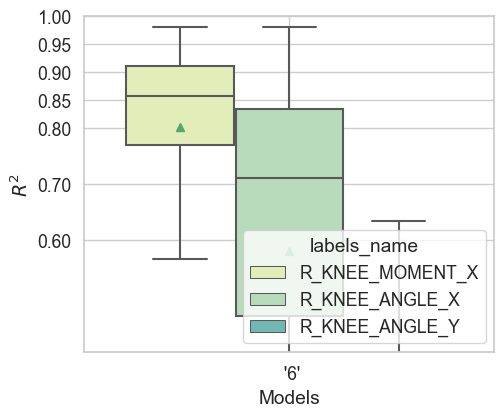

/home/sun/workspace/PythonProject/DataAnalysis/P6/transfer_learning_for_droplanding/assessments/./../../../CRCF/plot_utilities.py:45: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(figPath)
/home/sun/.pyenv/versions/3.9.2/envs/machinelearning/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


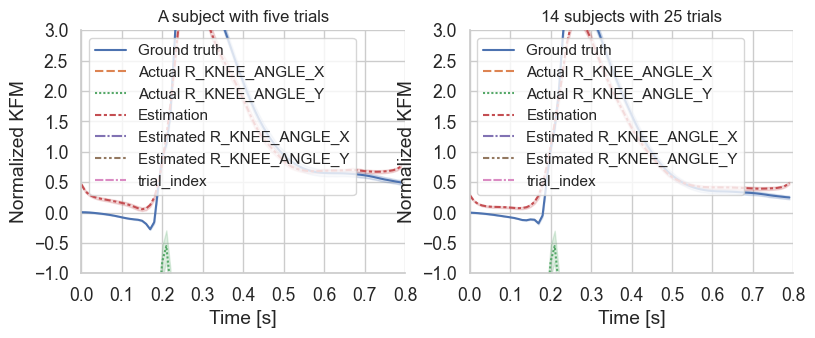

/media/sun/TFcard/drop_landing_workspace/results/training_testing/augmentation_v9/data_visulization/2023-03-29/18_28_43_curves..svg


In [50]:
## Plot estimation curves


combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","baseline_mlnn_v11_5",str(train_sub_num)+"sub",str(trial_num)+"trials","testing_result_folders.txt") for train_sub_num in [1] for trial_num in [5]
]+[
    os.path.join(RESULTS_PATH, "training_testing","baseline_mlnn_v11_5",str(train_sub_num)+"sub",str(trial_num)+"trials","testing_result_folders.txt") for train_sub_num in [14] for trial_num in [25]]

combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_v18",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(15,16,1) for trial_num in range(5, 6,5) for rot_id in [0]
]


combination_investigation_results =  [#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_kam_v20",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(4,5,1) for trial_num in range(5, 16,5) for rot_id in [0]
]


combination_investigation_results =  [#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "augmentation_dkem_v8",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(14,15,1) for trial_num in range(25, 26,5) for rot_id in [6]
]


combination_investigation_results =  [#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "augmentation_skem_v8",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(9,10,1) for trial_num in range(10,11,5) for rot_id in [6]
]




combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing", "augmentation_v9","testing_result_folders.txt"),
    os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_v9","testing_result_folders.txt")
]


metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder), "metrics.csv") for folder in combination_investigation_results]
fig_path, r2 = plot_models_accuracy(combination_investigation_results,plot_params={'x':'config_name','y':'r2','hue':'labels_name'})


multi_test_results = get_multi_models_test_results(combination_investigation_results)

config = {
    'xticks':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'yticks':[-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'ylim':[-1.0, 3.0],
    'figsize': (8,3),
    'ylabels': 5*['Normalized KFM'],
    'titles': ['A subject with five trials', '14 subjects with 25 trials'],
    'font_scale':1.0, 
    'save_fig': True,
    #'fig_path': os.path.join(RESULTS_PATH,"training_testing/visualization/P6","Fig_results_baseline_curves.svg"),
    'save_format': '.svg'
}

figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results, col_wrap=2, **config)

/home/sun/workspace/PythonProject/DataAnalysis/P6/transfer_learning_for_droplanding/assessments/./../../../CRCF/plot_utilities.py:45: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(figPath)
/home/sun/.pyenv/versions/3.9.2/envs/machinelearning/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


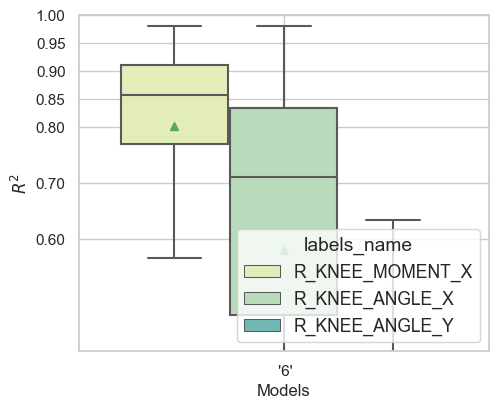

In [46]:

fig_path, r2 = plot_models_accuracy(combination_investigation_results,plot_params={'x':'config_name','y':'r2','hue':'labels_name'})

In [47]:
metrics.head()
metrics['r2']=metrics['r2'].astype(float)

In [48]:
metrics.groupby(['labels_name','model_selection','train_sub_num','trial_num','landing_manner']).mean()

/tmp/ipykernel_30398/1811341978.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metrics.groupby(['labels_name','model_selection','train_sub_num','trial_num','landing_manner']).mean()


r2  \
labels_name     model_selection train_sub_num trial_num landing_manner            
R_KNEE_ANGLE_X  augmentation    3             10         single_leg     0.40287   
                                6             10         single_leg     0.62331   
                                9             10         single_leg     0.49845   
                baseline_mlnn   3             10         double_leg     0.56100   
                                                         single_leg     0.39692   
                                6             10         double_leg     0.82088   
                                                         single_leg     0.65805   
                                9             10         double_leg     0.67274   
                                                         single_leg     0.58999   
R_KNEE_ANGLE_Y  augmentation    3             10         single_leg    -2.67495   
                                6             10         single_leg    -3.71990   
                                9             10         single_leg    -3.80314   
                baseline_mlnn   3             10         single_leg    -2.68407   
                                6             10         single_leg    -2.89696   
                                9             10         single_leg    -3.47725   
R_KNEE_MOMENT_X augmentation    3             10         single_leg     0.74936   
                                6             10         single_leg     0.87066   
                                9             10         single_leg     0.74952   
                baseline_mlnn   3             10         double_leg     0.77814   
                                                         single_leg     0.73130   
                                6             10         double_leg     0.84098   
                                                         single_leg     0.89010   
                                9             10         double_leg     0.82307   
                                                         single_leg     0.79016   

                                                                        trials  \
labels_name     model_selection train_sub_num trial_num landing_manner           
R_KNEE_ANGLE_X  augmentation    3             10         single_leg        0.0   
                                6             10         single_leg        0.0   
                                9             10         single_leg        0.0   
                baseline_mlnn   3             10         double_leg        0.0   
                                                         single_leg        0.0   
                                6             10         double_leg        0.0   
                                                         single_leg        0.0   
                                9             10         double_leg        0.0   
                                                         single_leg        0.0   
R_KNEE_ANGLE_Y  augmentation    3             10         single_leg        0.0   
                                6             10         single_leg        0.0   
                                9             10         single_leg        0.0   
                baseline_mlnn   3             10         single_leg        0.0   
                                6             10         single_leg        0.0   
                                9             10         single_leg        0.0   
R_KNEE_MOMENT_X augmentation    3             10         single_leg        0.0   
                                6             10         single_leg        0.0   
                                9             10         single_leg        0.0   
                baseline_mlnn   3             10         double_leg        0.0   
                                                         single_leg        0.0   
                                6             10         double_leg        0.0   
                                

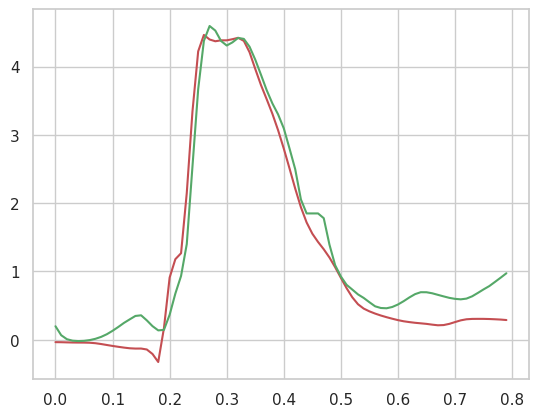

In [ ]:
pd_data = multi_test_results[0]
data =pd_data[pd_data['trial_index']==10]
data= data[data['test_subject']=='P_22_zhangning']
plt.plot(data['Actual R_KNEE_MOMENT_X'],'r')
plt.plot(data['Estimated R_KNEE_MOMENT_X'],'g')

In [11]:
set(multi_test_results[0]['test_subject'])

{'P_11_liuchunyu', 'P_15_liuzhaoyu', 'P_22_zhangning', 'P_23_wangjinhong'}

/media/suntao/DATA/drop_landing_workspace/results/training_testing/augmentation_dkem_v8/6rotid/14sub/25tri/testing_result_folders.txt 1


AttributeError: Use the `.axes` attribute when facet variables are assigned.

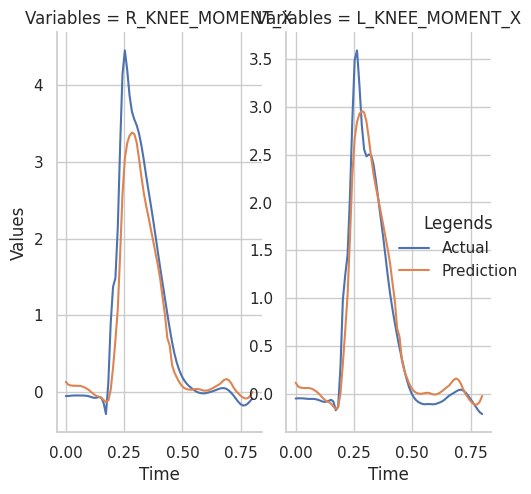

In [16]:
# plot extimation curve of a trial
print(combination_investigation_results[0],len(combination_investigation_results))
#testing_folder=
testing_folders =  get_investigation_training_testing_folders(combination_investigation_results[0])
testing_folder = testing_folders['testing_folders'][10]
[pd_labels, pd_predictions] = get_testing_results(testing_folder)
plot_prediction(pd_labels,pd_predictions,testing_folder,verbose=1)

In [ ]:
multi_model_results

### baseline heatmap

In [ ]:
# plot heatmap

combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_v11_5",
                str(sub_idx)+"sub", str(trial_idx)+"trials", 
                 "testing_result_folders.txt") for sub_idx in range(1,15,1) for trial_idx in range(5, 26,5)]

combination_investigation_results =  [#combination_investigation_results +[
    os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_v18",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(1,15,1) for trial_num in range(5, 6,5) for rot_id in [0]
]

combination_investigation_results =  [#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_v20",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(1,15,1) for trial_num in range(5, 26,5) for rot_id in [0]
]

#combination_investigation_results =  [#combination_investigation_results +[
#            os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_kam_v20",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
#                 "testing_result_folders.txt") for sub_num in range(1,5,1) for trial_num in range(5, 16,5) for rot_id in [0]
#]



#metrics = get_list_investigation_metrics(combination_investigation_results)


combination_investigation_metrics = [os.path.join(os.path.dirname(folder), "metrics.csv") for folder in combination_investigation_results]
metric_index='r2'
filters={'drop_value':0.2,'sort_variable':metric_index}
baseline_metrics = parse_list_investigation_metrics(combination_investigation_metrics,calculate_mean_subject_r2=False,**filters)
data = baseline_metrics[['train_sub_num', 'trial_num', metric_index]].groupby(['train_sub_num','trial_num']).median().round(2).reset_index().pivot('train_sub_num','trial_num')[metric_index]
#data = baseline_metrics[['trial_num','train_sub_num','mean_subject_r2']].groupby(['train_sub_num','trial_num']).median().round(2).reset_index().pivot('train_sub_num','trial_num')['mean_subject_r2']
ax = sns.heatmap(data, vmin=0.5, vmax=0.95,cmap="RdBu_r",center=0.8,annot=True,linewidths=0.3).invert_yaxis()
plt.ylabel('Subject number')
plt.xlabel('Trial number')
save_format='svg'
fig_path=os.path.join(RESULTS_PATH, "visualization/P6/Fig_results_baseline_heatmap.svg")
#fig_path=os.path.join("./","visualization/P6/Fig_results_baseline_heatmap.svg")

save_figure(fig_path,fig_format=save_format)
#save_figure(os.path.dirname(combination_investigation_metrics[0]),fig_format=save_format)


In [ ]:
# model estimation comparison

combination_investigation_results =  [#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_pkem_v1",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(14,15,1) for trial_num in range(25, 26,5) for rot_id in [10]
]


#combination_investigation_results =  combination_investigation_results +[
#            os.path.join(RESULTS_PATH, "training_testing", "augmentation_pkem_v1",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
#                 "testing_result_folders.txt") for sub_num in range(14,15,1) for trial_num in range(25, 26,5) for rot_id in [10]
#]
#
#
#combination_investigation_results =  combination_investigation_results +[
#            os.path.join(RESULTS_PATH, "training_testing", "augmentation_pkem_v1",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
#                 "testing_result_folders.txt") for sub_num in range(14,15,1) for trial_num in range(25, 26,5) for rot_id in [5,20, 30, 40]
#]
#

combination_investigation_results =  combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "augmentation_kem_v2",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(14,15,1) for trial_num in range(25, 26,5) for rot_id in [6, 7, 8,9,10,11]
]

#metrics = get_list_investigation_metrics(combination_investigation_results)


combination_investigation_metrics = [os.path.join(os.path.dirname(folder), "metrics.csv") for folder in combination_investigation_results]
fig_path, r2 = plot_models_accuracy(combination_investigation_results,plot_params={'x':'config_name','y':'r2','hue':'model_selection'})

In [ ]:
baseline_metrics.columns
set(baseline_metrics[(baseline_metrics['train_sub_num']==5) & (baseline_metrics['trial_num']==5)].sort_values(by=['r2'])['subjects'])

In [ ]:
baseline_metrics[(baseline_metrics['train_sub_num']==5) & (baseline_metrics['trial_num']==5)].sort_values(by=['r2'])#[['r2']]

In [ ]:
baseline_metrics[(baseline_metrics['train_sub_num']==5) & (baseline_metrics['trial_num']==5) & (baseline_metrics['subjects']=='P_08_zhangboyuan')].sort_values(by=['r2'])#[['r2']]

In [ ]:
baseline_metrics[(baseline_metrics['train_sub_num']>1)&(baseline_metrics['trial_num']>5)][['train_sub_num','trial_num','test_subject','r2','mean_subject_r2']].groupby(['train_sub_num','trial_num']).median()

In [ ]:
# table

filters={'drop_value':0.0,'sort_variable':'r2'}
baseline_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
baseline_metrics[['trial_num','train_sub_num','r2']][aug_metrics['trial_num'].isin([25])].groupby(['train_sub_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T

In [ ]:
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
baseline_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
baseline_metrics['subject_num'].replace({idx:idx-4 for idx in range(5,11)},inplace=True)

baseline_metrics[['trial_num','subject_num','r2']][baseline_metrics['trial_num'].isin([25])].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T
#baseline_metrics[['trial_num','subject_num','r2']].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T

## Augmentation

### Augmentation curves

provided fig_path is wrong, please give a complete path


UnboundLocalError: local variable 'figPath' referenced before assignment

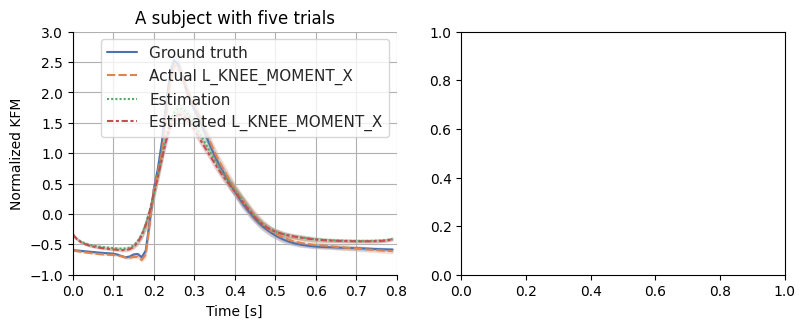

In [8]:
# Plot estimation results of augmentation


combination_investigation_results = [
    #os.path.join(RESULTS_PATH, "training_testing","augmenation_v11_5",str(train_sub_num)+"sub",str(trial_num)+"trials","testing_result_folders.txt") for train_sub_num in [1,14] for trial_num in [25]
    os.path.join(RESULTS_PATH, "training_testing","augmenation_v15", str(train_sub_num)+"sub",str(trial_num)+"trials","testing_result_folders.txt") for train_sub_num in [1,14] for trial_num in [25]
                                    ]

combination_investigation_results =  [#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "augmentation_dkem_v6",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(14,15,1) for trial_num in range(25, 26,5) for rot_id in [180]
]

config = {
  'xticks':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
  'yticks':[-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
 'ylim':[-1.0, 3.0],
  'figsize': (8,3),
  'ylabels': 5*['Normalized KFM'],
   'titles': ['A subject with five trials', '14 subjects with 25 trials'],
  'font_scale':1.0, 
   'save_fig': True,
    'fig_path': os.path.join(RESULTS_PATH,"training_testing/visualization/P6","Fig_results_augmentation_curves.svg"),
    'save_format': '.svg'
}

figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results, col_wrap=2, **config)

### Augmentation heatmap

/media/suntao/DATA/drop_landing_workspace/results/training_testing/augmentation_dkem_v6/180rotid/14sub/25tri/testing_result_folders.txt
/media/suntao/DATA/drop_landing_workspace/results/training_testing/augmentation_dkem_v6/180rotid/14sub/25tri/metrics.csv
DROP R2 cases below :0.2
provided fig_path is wrong, please give a complete path


/tmp/ipykernel_44116/3652970570.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = aug_metrics[['train_sub_num', 'trial_num', metric_index]].groupby(['train_sub_num','trial_num']).median().round(2).reset_index().pivot('train_sub_num','trial_num')[metric_index]


UnboundLocalError: local variable 'figPath' referenced before assignment

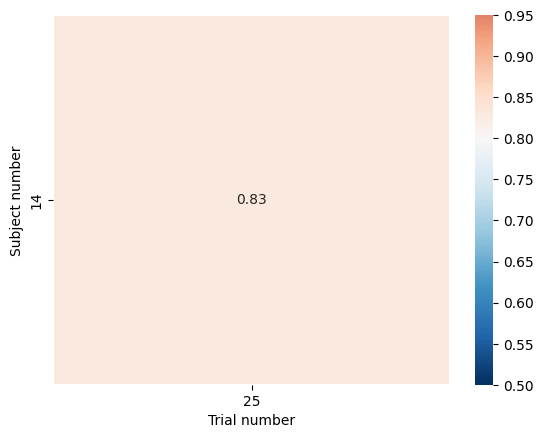

In [5]:
# imu augmentation
combination_investigation_results = [ 
    os.path.join(RESULTS_PATH, "training_testing","augmentation_v11_5", str(train_sub_num)+"sub", str(trial_num)+"trials",
                 "testing_result_folders.txt") for train_sub_num in range(1,15,1) for trial_num in range(5,26,5)]


combination_investigation_results =  [#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "augmentation_kem_v3",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(2,15,1) for trial_num in range(25, 26,5) for rot_id in [6]
]

combination_investigation_results =  [#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "augmentation_dkem_v6",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(14,15,1) for trial_num in range(25, 26,5) for rot_id in [180]
]

metrics = get_list_investigation_metrics(combination_investigation_results)

combination_investigation_metrics = [os.path.join(os.path.dirname(folder), "metrics.csv") for folder in combination_investigation_results]
metric_index='r2'
filters={'drop_value':0.2,'sort_variable':metric_index}
aug_metrics = parse_list_investigation_metrics(combination_investigation_metrics,**filters)
#aug_metrics['subject_num'].replace({idx:idx-4 for idx in range(5,11)},inplace=True)

data = aug_metrics[['train_sub_num', 'trial_num', metric_index]].groupby(['train_sub_num','trial_num']).median().round(2).reset_index().pivot('train_sub_num','trial_num')[metric_index]
ax = sns.heatmap(data, vmin=0.5, vmax=0.95,cmap="RdBu_r",center=0.8,annot=True,linewidths=0.3).invert_yaxis()
plt.ylabel('Subject number')
plt.xlabel('Trial number')
save_format='svg'
fig_path = os.path.join(RESULTS_PATH, "visualization/P6/Fig_results_augmentation_heatmap.svg")
save_figure("",fig_path=fig_path,fig_format=save_format)



In [6]:

combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v2",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(1,15,1) for trial_idx in range(5,6,5)
]

#metrics = get_list_investigation_metrics(combination_investigation_results)

combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
#filters={}

aug_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)

NameError: name 'parase_list_investigation_metrics' is not defined

In [ ]:
aug_metrics[['test_subject','child_test_id','r2','subject_num']].groupby(['test_subject', 'subject_num']).mean().round(2).to_csv('ss.csv')

In [ ]:
aug_metrics.head()

In [ ]:
# table

filters={'drop_value':0.0,'sort_variable':'r2'}
aug_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
aug_metrics[['trial_num','subject_num','r2']][aug_metrics['trial_num'].isin([25])].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T

## Comparsion

In [ ]:
# compare baseline and imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","baseline_mlnn_v11_5",
                 str(train_sub_num)+"sub",str(trial_num)+"trials",
                 "testing_result_folders.txt") for train_sub_num in range(1,15,1) for trial_num in range(25,26,5)
                                    ]+ [
    os.path.join(RESULTS_PATH, "training_testing","augmentation_v11_5",
                 str(train_sub_num)+"sub",str(trial_num)+"trials",
                 "testing_result_folders.txt") for train_sub_num in range(1,15,1) for trial_num in range(25,26,5)
                                    ]


combination_investigation_results =  [#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_v20",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(1,15,1) for trial_num in range(5, 26,5) for rot_id in [0]
                        ]+[#combination_investigation_results +[
            os.path.join(RESULTS_PATH, "training_testing", "augmentation_kem_v3",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(2,15,1) for trial_num in range(25, 26,5) for rot_id in [6]
]


#metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]

#subs = list(set(metrics['alias_name']))
#replace_values = {sub: int(sub.split('v')[1])-1 for sub in subs}
replace_values = {}
replace_values.update({'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'})
replace_values.update({'baseline_mlnn': 'Measured dataset', 'finetuning': 'Fine-tuning', 'augmentation': 'Augmented dataset', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'})
print(replace_values)
replace_columns = {'train_sub_num': 'Train subject number', 'trial_num': 'Trial number', 'model_selection':'Dataset'}
test_pairs =(
            [(1,'Measured dataset'), (1,'Augmented dataset')],
            [(2,'Measured dataset'), (2,'Augmented dataset')],
            [(3,'Measured dataset'), (3,'Augmented dataset')],
            [(4,'Measured dataset'), (4,'Augmented dataset')],
            [(5,'Measured dataset'), (5,'Augmented dataset')],
            [(6,'Measured dataset'), (6,'Augmented dataset')],
            [(7,'Measured dataset'), (7,'Augmented dataset')],
            [(8,'Measured dataset'), (8,'Augmented dataset')],
            [(9,'Measured dataset'), (9,'Augmented dataset')],
            [(10,'Measured dataset'), (10,'Augmented dataset')],
            [(11,'Measured dataset'), (11,'Augmented dataset')],
            [(12,'Measured dataset'), (12,'Augmented dataset')],
            [(13,'Measured dataset'), (13,'Augmented dataset')],
            [(14,'Measured dataset'), (14,'Augmented dataset')],
            )


plot_config={
        "save_fig": True, "save_format":"jpg", "save_folder_index": 0,
         'figsize':(8, 5),
         "hue": 'Dataset',
        'replace_values': replace_values,
        'replace_columns': replace_columns,
        'x': 'Train subject number',
        #'y': 'mean_subject_r2',
        'y': 'r2',
        'title': 'baseline',
        'yticks': ( 0.7, 0.8, 0.9, 1.0),
        #'plot_title': 'baseline',
    'filters': {'drop_value':0.0,'sort_variable':'r2'},
    'font_scale': 1.0,
    'plot_type': 'barplot',
    'ttest':True,
    'fig_path': os.path.join(RESULTS_PATH, "visualization/P6/Fig_results_comparison_v2.svg"),
    'test_pairs':test_pairs
    }

filters={'drop_value':0.0,'sort_variable':'r2'}
p6plot_model_accuracy(combination_investigation_metrics, **plot_config)

## Explore augmentation parameters

In [4]:
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing", "baseline_mlnn_v17",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(15,16,1) for trial_num in range(25, 26,5) for rot_id in [0]
    ]+[
    os.path.join(RESULTS_PATH, "training_testing", "augmentation_v16",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(15,16,1) for trial_num in range(25, 26,5) for rot_id in [10,30]
    ]+[
    os.path.join(RESULTS_PATH, "training_testing", "augmentation_v17",str(rot_id)+'rotid', str(sub_num)+"sub", str(trial_num)+"tri",  
                 "testing_result_folders.txt") for sub_num in range(15,16,1) for trial_num in range(25, 26,5) for rot_id in [50, 70, 90, 110, 130, 150, 170]
    ]

metrics = get_list_investigation_metrics(combination_investigation_results)

/media/sun/TFcard/drop_landing_workspace/results/training_testing/baseline_mlnn_v17/0rotid/15sub/25tri/testing_result_folders.txt
/media/sun/TFcard/drop_landing_workspace/results/training_testing/augmentation_v16/10rotid/15sub/25tri/testing_result_folders.txt
/media/sun/TFcard/drop_landing_workspace/results/training_testing/augmentation_v16/30rotid/15sub/25tri/testing_result_folders.txt
/media/sun/TFcard/drop_landing_workspace/results/training_testing/augmentation_v17/50rotid/15sub/25tri/testing_result_folders.txt
/media/sun/TFcard/drop_landing_workspace/results/training_testing/augmentation_v17/70rotid/15sub/25tri/testing_result_folders.txt
/media/sun/TFcard/drop_landing_workspace/results/training_testing/augmentation_v17/90rotid/15sub/25tri/testing_result_folders.txt
/media/sun/TFcard/drop_landing_workspace/results/training_testing/augmentation_v17/110rotid/15sub/25tri/testing_result_folders.txt
/media/sun/TFcard/drop_landing_workspace/results/training_testing/augmentation_v17/130rot

In [ ]:
#metrics['r2']=metrics['r2'].astype(float)
#sns.barplot(data=metrics, x='config_name',y='r2')
#plt.grid()

combination_investigation_metrics = [os.path.join(os.path.dirname(folder), "metrics.csv") for folder in combination_investigation_results]

fig_path, r2 = plot_models_accuracy(combination_investigation_results,plot_params={'x':'config_name','y':'r2', 'hue':'train_sub_num'})

In [ ]:
%run visualization

### Augmentation